# Converting tensorflow model (Keras) to tflite

## Importing Packages and Data

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input


In [2]:
tf.__version__

'2.10.1'

In [3]:
np. __version__

'1.23.3'

In [4]:
## change name to your best saved model. Check directory to see the best model.

model = keras.models.load_model('xception_v4_1_39_0.954.h5')

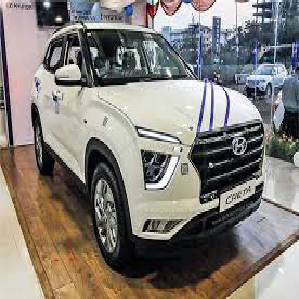

In [5]:
img = load_img('Dataset/test/Hyundai Creta/88.jpg', target_size=(299, 299))

img

## Preprocessing Image and Testing Saved model

In [6]:
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [7]:
preds = model.predict(X)

1/1 [==============================] - 4s 4s/step


In [8]:
preds

array([[  0.19040965,  14.998951  ,  -6.597778  , -16.613018  ,
         -1.2414063 ,   0.69107616, -10.387562  ]], dtype=float32)

In [9]:
classes = [
    'Audi',
    'Hyundai Creta',
    'Mahindra Scorpio',
    'Rolls Royce',
    'Swift',
    'Tata Safari',
    'Toyota Innova'
]

In [10]:
dict(zip(classes, preds[0]))

{'Audi': 0.19040965,
 'Hyundai Creta': 14.998951,
 'Mahindra Scorpio': -6.597778,
 'Rolls Royce': -16.613018,
 'Swift': -1.2414063,
 'Tata Safari': 0.69107616,
 'Toyota Innova': -10.387562}

## Convert Keras to TF-Lite and remove tensorflow dependency

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('car-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\eddye\AppData\Local\Temp\tmpxjb2kqwq\assets


INFO:tensorflow:Assets written to: C:\Users\eddye\AppData\Local\Temp\tmpxjb2kqwq\assets


In [13]:
# !pip install keras-image-helper

In [14]:
# !pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

<b> Restart Kernel before rerunning the sections below. This is because of tflite_runtime.interpreter <b>

In [1]:
from keras_image_helper import create_preprocessor

#import tensorflow.lite as tflite
# If interpreter already registered pops up, comment out `import tflite_runtime.interpreter as tflite`

import tflite_runtime.interpreter as tflite

In [2]:
interpreter = tflite.Interpreter(model_path='car-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [3]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [4]:
path = 'Dataset/test/Hyundai Creta/88.jpg'
X = preprocessor.from_path(path)

In [5]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [6]:
classes = [
    'Audi',
    'Hyundai Creta',
    'Mahindra Scorpio',
    'Rolls Royce',
    'Swift',
    'Tata Safari',
    'Toyota Innova'
]

In [7]:
dict(zip(classes, preds[0]))

{'Audi': 0.19040371,
 'Hyundai Creta': 14.9989395,
 'Mahindra Scorpio': -6.5977683,
 'Rolls Royce': -16.613012,
 'Swift': -1.2414044,
 'Tata Safari': 0.69108176,
 'Toyota Innova': -10.3875675}